## Problem Definition

### **Business Context**
An online news portal called Xpress-News aims to expand its business by acquiring new subscribers. The executives in Xpress-News are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

### **Objective**
You are a Data Scientist working in Xpress-News. The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. You have been assigned the task to test & prove statistically whether the new landing page is more effective in attracting new subscribers. 

#### **Solution Approach**
You randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). How much time was spent by each customer on the landing page and whether or not the customer got converted to a subscriber is collected in <b>abtest.csv</b> dataset. Use the technique of <b>A/B Testing</b> to make conclusions based on statistical evidence about the effectiveness of the new landing page.

#### **Data Dictionary**

1. user_id - This represents the user ID of the person visiting the website.

2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).

3. landing_page - This represents whether the landing page is new or old.

4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.

5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.

6. language_preferred - This represents the language chosen by the user to view the landing page.

## 1.0 Data Import and Sense Checks

### 1.1 Import all the necessary libraries

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Run this to make sure you have the latest version of scipy
#!pip install scipy --upgrade

In [6]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats
import statsmodels.stats as sm

### 1.2 Load the dataset

In [7]:
# Upload the dataset into google colab's working directory
from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

Saving abtest.csv to abtest.csv


In [8]:
data = pd.read_csv('abtest.csv')

In [9]:
# Copy the data to another varaible to avoid any changes to original data
df = data.copy()

In [10]:
# View the first few rows of the dataset to check if the load worked
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [11]:
# Check the shape of the dataset
df.shape

(100, 6)

The dataset has 100 rows and 6 columns.

In [12]:
# Check if all the columns are set to the right datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


There are 6 columns named **'user_id', 'group', 'landing_page', 'time_spent_on_the_page', 'converted', 'language_preferred'** whose data types are **int64, object, object, float64, object, object** respectively.

In [13]:
# Check if there are any missing values
df.isna().sum()   #null value check

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no missing values in any of the column

### 1.3 Descriptive statistics of continuous variables

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


Ignore the user_id column as it is not a measure, it is a unique key
* The maximum time spent on the landing page is less than 11 minutes.
* The mean time spent on the landing page is approximately 5.4 minutes.
* The median time spent on the landing page is approximately 5.4 minutes.

### 1.4 Descriptive Statistics of categorical variables

In [ ]:
df.describe(include = ['object']).T

,count,unique,top,freq
group,100,2,treatment,50
landing_page,100,2,old,50
converted,100,2,yes,54
language_preferred,100,3,French,34


### 1.5 Check for imbalance in Data

In [ ]:
df['group'].value_counts()

treatment    50
control      50
Name: group, dtype: int64

In [ ]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

In [ ]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [ ]:
df['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

* There are 100 unique users - equally distributed as control (who visited the old landing page) and treatment (who visited the new landing page)
* Overall, 55 users got converted and 45 users did not get converted after visiting the landing pages.
* There are 3 unique preferred languages - English, French, and Spanish, which are proportionate across the dataset.

## 2.0 Plotting the Data Distributions

### 2.1 Understanding the distribution of time spent on the landing page

Let's check the distribution of the time spent by customers on the old and new pages by plotting histograms.

old page mean = 4.5324


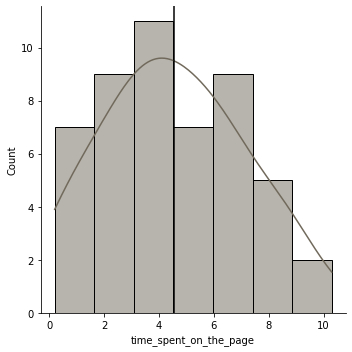

In [ ]:
sns.displot(data=df[df['landing_page'] == 'old'],x='time_spent_on_the_page', kde=True, color='#716a5c')
plt.axvline(x=df[df['landing_page'] == 'old']['time_spent_on_the_page'].mean(), color='black')

print('old page mean =',round(df[df['landing_page'] == 'old']['time_spent_on_the_page'].mean(),4))

new page mean = 6.2232


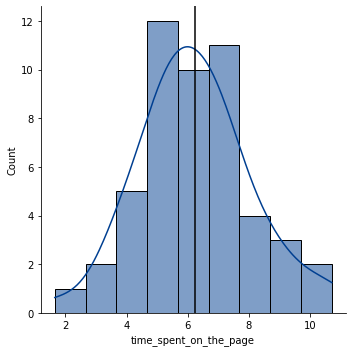

In [ ]:
sns.displot(data=df[df['landing_page'] == 'new'],x='time_spent_on_the_page', kde=True, color='#003f91')
plt.axvline(x=df[df['landing_page'] == 'new']['time_spent_on_the_page'].mean(), color='black')

print('new page mean =',round(df[df['landing_page'] == 'new']['time_spent_on_the_page'].mean(),4))

#### **Observation** 
The two distributions on top look like a bell-shaped curve, with almost symmetric tails on both ends. Let's try to understand what this distribution is and what are its properties?

### 2.2 What is a Normal distribution?

The Normal distribution is the most common and useful continuous probability distribution. It is characterized by a symmetric bell-shaped curve having two parameters - mean (μ) and standard deviation (𝜎). The distribution is called normal because they are commonly found everywhere starting from nature to industry, for example, the height and weight of the adults, IQ scores, measurement errors, quality control test results, etc.

### 2.2 Properties of Normal distribution

1. The graph of the normal distribution is called  the normal curve
2. Normal curve is symmetric around the mean
3. Mean, Median, and Mode of a normal distribution are equal
4. Total area under the normal curve is 1
5. About 68.3% of the data fall within one standard deviations from the mean
6. About 95.5% of the data fall within two standard deviations from the mean
7. About 99.7% of the data fall within three standard deviations from the mean

The properties 5, 6, and 7 are collectively called as <b>Empirical Rule</b> 

![](https://miro.medium.com/max/500/1*Xk7pnbtAmpCSNxtpKznpeg.png)

### 2.3 Comparing the distributions of time spent on old & new landing pages

old page mean = 4.5324
new page mean = 6.2232
difference in mean = 1.6908


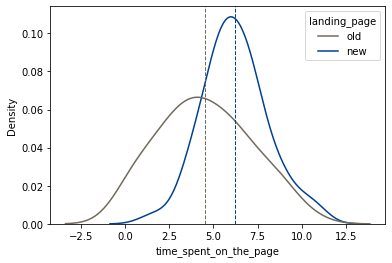

In [ ]:
sns.kdeplot(data=df,x='time_spent_on_the_page', hue='landing_page', palette=['#716a5c','#003f91']) 
plt.axvline(x=df[df['landing_page'] == 'old']['time_spent_on_the_page'].mean(), color='#716a5c', linestyle='--', linewidth=1)
plt.axvline(x=df[df['landing_page'] == 'new']['time_spent_on_the_page'].mean(), color='#003f91', linestyle='--', linewidth=1)

old_page_mean = round(df[df['landing_page'] == 'old']['time_spent_on_the_page'].mean(),4)
new_page_mean = round(df[df['landing_page'] == 'new']['time_spent_on_the_page'].mean(),4)

print('old page mean =',old_page_mean)
print('new page mean =',new_page_mean)

print('difference in mean =',round(new_page_mean - old_page_mean,4))

#### **Observations**: 

* If you compare the <b>spread</b> of the time spent by the customers on the old and new page, you can observe the data for the old page is more spread across (more variance means, lesser confidence on the mean value).

* If you compare the <b>mean</b> values of the time spent by customers on the old and new page, you can see that customers who were routed to the new page spent on <b>average ~1.6 minutes more</b> on the page when compared to the customers viewing the old page.

* Is this increase in the mean by 1.6 minutes significant? How do you know this did not happen by chance? 

This demands a way to statistically prove that the difference is significant and did not occur by chance. This process is called <b>Hypothesis Testing</b> and <b>A/B Testing</b> is a form of Hypothesis test which is used to compare two independent samples to check if their distributions are from distinct populations.

## 3.0 A/B Testing

#### Perform A/B Testing to determine the effectiveness of the new landing page.

Let's perform a hypothesis test to determine with statistical significance, whether the new landing page is more effective than the old landing page. To determine this, we will use statistical analysis to answer the question: 

**Has the design of the new landing page increased the average time customers spend on the page significantly?**

### 3.1 What is a Hypothesis? How do you frame a Hypothesis?

$H_0:$ The mean time spent by the users on the new page is <b>equal</b> to the mean time spent by the users on the old page.

$H_a:$ The mean time spent by the users on the new page is <b>greater than</b> the mean time spent by the users on the old page.

Let $\mu_1$ and $\mu_2$ be the mean time spent by the users on the new and old page respectively.

Mathematically, the above-formulated hypotheses can be written as:

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 > \mu_2$

<b>Let's try to understand the statements made above</b>

There are two types of Hypothesis - Null and Alternative

* The <b>Null Hypothesis</b> is the presumed current state of the matter or status quo. It is the commonly accepted fact. The null hypothesis is assumed to be true unless reasonably strong evidence to the contrary is found. It is denoted as $H_0$. It always contains equality (=, >=, <=) in its formulation.

* The <b>Alternative Hypothesis</b> is any statement that is contradictory to the null hypothesis. It is denoted as $H_a$. It does not contain equality (≠, >, <) in its formulation. 

### 3.2 How do you mathematically test the above Hypothesis?

The 3 components that make up the math are:
* The sample mean values
* The sample standard deviations 
* The sample size

Using the above components, we calculate a value called the <b>t-Statistic</b>, and use that value to determine if the difference in mean between 2 samples is statistically significant or not.

<h1>$$
t=\frac{\bar{X}_1-\bar{X}_2}{\sqrt{\frac{S_{1}^{2}}{N_{1}}+\frac{S_{2}^{2}}{N_{2}}}}
$$</h1>












$\bar{X}_1$: Sample mean of time_spent_on_the_page for customers visiting the new page

$\bar{X}_2$: Sample mean of time_spent_on_the_page for customers visiting the old page

${S_1}^2$: Sample standard deviation of time_spent_on_the_page for customers visiting the new page

${S_2}^2$: Sample standard deviation of time_spent_on_the_page for customers visiting the old page

${N_1}$: Sample Size of customers visiting the new page

${N_2}$: Sample Size of customers visiting the old page

Let's calculate the t-statistic.

In [ ]:
X1 = df[df['landing_page'] == 'new']['time_spent_on_the_page'].mean()
X2 = df[df['landing_page'] == 'old']['time_spent_on_the_page'].mean()

S1 = df[df['landing_page'] == 'new']['time_spent_on_the_page'].std()
S2 = df[df['landing_page'] == 'old']['time_spent_on_the_page'].std()

N1 = N2 = 50

In [ ]:
t_stat = (X1 - X2) / np.sqrt( (S1**2/N1) + (S2**2/N2) )

print('t-statistic =',t_stat)

t-statistic = 3.7867702694199856


### 3.3 How do you interpret the t-statistic?

The t-statistic we computed above follows a <b>t-distribution</b> with (N1 + N2 - 2) degrees of freedom.

Just like the normal distribution, t-distribution is also very useful in statistical inference. It is a symmetric distribution around 0. For a very large d.f., the t distribution is almost identical to the standard normal distribution.The parameter of t-distribution is known as degrees of freedom.

When we do not know the population standard deviation, the t-distributions are used instead of the normal distribution.

Let's see what this distribution looks like and where the calculated t-statistic lies in that distribution?

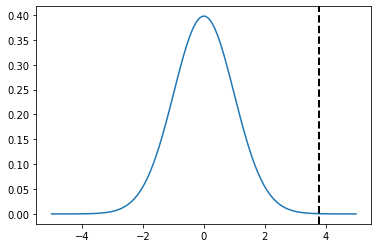

In [ ]:
# Plotting the t-statistic distribution along with computed t-statistic
x = np.linspace(-5, 5, 100) # create an array of 100 numbers starting from -5 and ending at 5
plt.plot(x, stats.t.pdf(x, df=N1+N2-2)) # plot the pdf of the t-distribution
plt.axvline(x = t_stat, color='black', linestyle='--', linewidth=2) # draw a vertical red line through the mentioned point
plt.show() # display the plot

[Documentation of stats.t methods](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html)

**Observation(s)**:
* The computed t-statistic lies at the extreme right of the t-distribution (close to 4 standard deviations away from the mean).
* The farther the t-statistic is from the mean, the more the evidence that the difference in mean between 2 samples is significant, and did not occur by chance.

**Question to ask yourself**: Beyond what threshold do you decide if your computed t-statistic is significant or not?

How do you define significance? If your t-statistic falls inside 5% of the area to the right of the t-distribution, consider that as a significant event. 

This value is called the <b>Level of Significance</b> or alpha (<b>α</b>). Usually, this threshold is set at 5%. Now, let's compute where this threshold value lies in the t-distribution?



In [ ]:
# Calculate the value, area to the right of which is 0.05
alpha = 0.05
p_value = stats.t.sf(t_stat, df=N1+N2-2)
print('P-Value =',p_value)

P-Value = 0.0001316123528095005


The area to the right is much lower than the choosent significance level alpha

### 3.4 Arriving at a conclusion based on the critical value

Based on the comparison between the p-value and alpha, we can arrive at either of the below conclusions:

* If the p-value is smaller than the alpha, then we **reject** the **Null Hypothesis**

* If the p-value is larger than or equal to the alpha, then we **accept** the **Null Hypothesis**

In [ ]:
# print the conclusion based on t-statistic
if p_value < alpha:
    print(f'As the p-value {p_value} is smaller than the alpha {alpha}, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is larger than or equal to the alpha {alpha}, we fail to reject the null hypothesis.')

As the p-value 0.0001316123528095005 is smaller than the alpha 0.05, we reject the null hypothesis.


## 4.0 Inference and Conclusion

Since, the p-value is smaller than the alpha, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.



---

